# CVEN5323 Project Data Analysis

Load, examine, and clean up the data.

In [1]:
setwd("C:\\Users\\Ziyu\\Documents\\College\\2021 08-12 Fall\\CVEN5323 Stream Ecology\\Project") #set working drive
file <- read.csv("Data20211023BUGS.csv")
file$X.notes.guesses <- NULL
head(file)

sample_id,sample_location,location_on_stream,sample_time,bed_type,functional_group,count
A1,South Platte below confluence,right bank,9:24,rocky,midge (gather/collecter),3
A1,South Platte below confluence,right bank,9:24,rocky,stonefly (shredder),2
A1,South Platte below confluence,right bank,9:24,rocky,stonefly (predator),5
A1,South Platte below confluence,right bank,9:24,rocky,mayfly (scraper),5
A1,South Platte below confluence,right bank,9:24,rocky,mayfly (gather/collecter),1
A1,South Platte below confluence,right bank,9:24,rocky,mayfly (unknown),1


Calculate Shannon's Diversity Index (H) and Equitability Index (EH) by using the formulas found on this site: http://www.tiem.utk.edu/~gross/bioed/bealsmodules/shannonDI.html

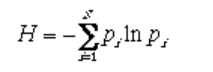
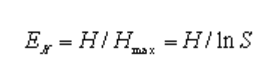

Where S is total number of species in the community (richness).

We will calculate by each Site A, B, and C.

## Site A

#### Species( include functional groups)
Functional groups are counted together with the species.

In [2]:
df <- data.frame(matrix(ncol = 5, nrow = 3)) #empty 3x3 data frame
names(df) <- c("Site","H", "EH","S","TotN")
df$Site <- c("A", "B", "C") #name them properly
A <- rbind(file[file$sample_id == "A1",], file[file$sample_id == "A2",]) #samples from A1 and A2

In [3]:
SiteA <- data.frame(matrix(ncol = 2, nrow = length(levels(A$functional_group)))) #another empty dataset for bug data for A
names(SiteA) <- c("Species","count")
SiteA$Species <- levels(A$functional_group) #name out all the species
SiteA$count <- 0
for (i in 1:nrow(SiteA)){
    for (j in 1:nrow(A)){
        if (SiteA$Species[i] == A$functional_group[j]){
            SiteA$count[i] <- SiteA$count[i] + A$count[j]
        }
    }
} #adding all the same "species" together. Probably a better way to do this.
SiteA <- SiteA[SiteA$count != 0,] #get rid of the species that were not obsrved
sum(A$count) == sum(SiteA$count) #must say "TRUE", checking that it compiled correctly

[1] TRUE

In [4]:
SiteA$p <- SiteA$count/sum(SiteA$count) #calculating proportions of each "species"
head(SiteA) #make sure it checks out

,Species,count,p
2,mayfly (gather/collecter),32,0.278260870
3,mayfly (scraper),15,0.130434783
5,mayfly (unknown),1,0.008695652
6,midge (gather/collecter),3,0.026086957
8,shrimpy,1,0.008695652
12,stonefly (predator),11,0.095652174


In [5]:
HA <- -sum(SiteA$p * log(SiteA$p)) #diversity index
EHA <- HA/log(nrow(SiteA)) #Eveness
MasterF <- df
MasterF[1,2:5] <- c(HA, EHA , nrow(SiteA), sum(SiteA$count))
HA; EHA; nrow(SiteA); sum(SiteA$count)

[1] 1.778169

[1] 0.7155877

[1] 12

[1] 115

In [6]:
MasterF

Site,H,EH,S,TotN
A,1.778169,0.7155877,12,115
B,NA,NA,NA,NA
C,NA,NA,NA,NA


The Shannon's Diversity Index (H) is 1.778; The eveness is 0.715; The richness (S) is 12. Total number of bugs is 115, over 2 ${ft}^2$ of area.

In [7]:
SiteA

,Species,count,p
2,mayfly (gather/collecter),32,0.278260870
3,mayfly (scraper),15,0.130434783
5,mayfly (unknown),1,0.008695652
6,midge (gather/collecter),3,0.026086957
8,shrimpy,1,0.008695652
12,stonefly (predator),11,0.095652174
13,stonefly (shredder),11,0.095652174
14,stonefly (unknown),1,0.008695652
15,unknown #1,1,0.008695652
16,unknown #2,1,0.008695652


#### Species not including functional groups

In [8]:
Site_A <- data.frame(matrix(ncol = 2, nrow = 8))
names(Site_A) <- c("Species","count")
Site_A$Species <- c("mayfly","midget","shrimpy","stonefly","unknown #1","unknown #2","unknown #3","wigglebutts")
Site_A$count <- c(sum(SiteA$count[1:3]),SiteA$count[4:5],sum(SiteA$count[6:8]),SiteA$count[9:12]) #compile mayfly/stonefly
Site_A #looks good
sum(Site_A$count) == sum(SiteA$count) #must be TRUE, check everything works out

Species,count
mayfly,48
midget,3
shrimpy,1
stonefly,23
unknown #1,1
unknown #2,1
unknown #3,1
wigglebutts,37


[1] TRUE

In [9]:
Site_A$p <- Site_A$count/sum(Site_A$count) 
sum(Site_A$p) == 1 #this must be true, verifies everything works
H_A <- -sum(Site_A$p * log(Site_A$p)) #diversity index
EH_A <- H_A/log(nrow(Site_A)) #Eveness
Master <- df
Master[1,2:5] <- c(H_A, EH_A , nrow(Site_A), sum(Site_A$count)) #store them in a master matrix
H_A; EH_A; nrow(Site_A); sum(Site_A$count); Master

[1] TRUE

[1] 1.311595

[1] 0.6307437

[1] 8

[1] 115

Site,H,EH,S,TotN
A,1.311595,0.6307437,8,115
B,NA,NA,NA,NA
C,NA,NA,NA,NA


The Shannon's Diversity Index (H) is 1.312; The eveness is 0.631; The richness (S) is 8. Total number of bugs is 115, over 2 ${ft}^2$ of area.

## Site B

#### Species( include functional groups)
Functional groups are counted together with the species.

In [10]:
B <- rbind(file[file$sample_id == "B1",], file[file$sample_id == "B2",]) #samples from B1 and B2
SiteB <- data.frame(matrix(ncol = 2, nrow = length(levels(B$functional_group)))) #another empty dataset for bug data for B
names(SiteB) <- c("Species","count")
SiteB$Species <- levels(B$functional_group) #name out all the species
SiteB$count <- 0
for (i in 1:nrow(SiteB)){
    for (j in 1:nrow(B)){
        if (SiteB$Species[i] == B$functional_group[j]){
            SiteB$count[i] <- SiteB$count[i] + B$count[j]
        }
    }
} #adding all the same "species" together. Probably a better way to do this.
SiteB <- SiteB[SiteB$count != 0,] #get rid of the species that were not obsrved
sum(B$count) == sum(SiteB$count) #must say "TRUE", checking that it compiled correctly

[1] TRUE

In [11]:
SiteB$p <- SiteB$count/sum(SiteB$count) #calculating proportions of each "species"
HB <- -sum(SiteB$p * log(SiteB$p)) #diversity index
EHB <- HB/log(nrow(SiteB)) #Eveness
MasterF[2,2:5] <- c(HB, EHB , nrow(SiteB), sum(SiteB$count))
HB; EHB; nrow(SiteB); sum(SiteB$count)
MasterF

[1] 1.519822

[1] 0.6917007

[1] 9

[1] 59

Site,H,EH,S,TotN
A,1.778169,0.7155877,12,115
B,1.519822,0.6917007,9,59
C,NA,NA,NA,NA


The Shannon's Diversity Index (H) is 1.520; The eveness is 0.692; The richness (S) is 9. Total number of bugs is 59, over 2 ${ft}^2$ of area.

In [12]:
SiteB

,Species,count,p
2,mayfly (gather/collecter),1,0.01694915
3,mayfly (scraper),30,0.50847458
7,red worm,10,0.16949153
13,stonefly (shredder),9,0.15254237
19,worm 1,2,0.03389831
20,worm 2,1,0.01694915
21,worm 3,1,0.01694915
22,worm 4,2,0.03389831
23,worm 5,3,0.05084746


#### Species not including functional groups

In [13]:
Site_B <- data.frame(matrix(ncol = 2, nrow = 8)) #empty matrix
names(Site_B) <- c("Species","count")
Site_B$Species <- c("mayfly","red worm","stonefly","worm 1","worm 2","worm 3","worm 4","worm 5")
Site_B$count <- c(sum(SiteB$count[1:2]),SiteB$count[3:9]) #compile mayfly/stonefly
Site_B #looks good
sum(Site_B$count) == sum(SiteB$count) #must be TRUE, check everything works out

Species,count
mayfly,31
red worm,10
stonefly,9
worm 1,2
worm 2,1
worm 3,1
worm 4,2
worm 5,3


[1] TRUE

In [14]:
Site_B$p <- Site_B$count/sum(Site_B$count) #calculating proportions of each "species"
H_B <- -sum(Site_B$p * log(Site_B$p)) #diversity index
EH_B <- H_B/log(nrow(Site_B)) #Eveness
H_B; EH_B; nrow(Site_B); sum(Site_B$count)
Master[2,2:5] <- c(H_B, EH_B , nrow(Site_B), sum(Site_B$count))
Master

[1] 1.444946

[1] 0.6948721

[1] 8

[1] 59

Site,H,EH,S,TotN
A,1.311595,0.6307437,8,115
B,1.444946,0.6948721,8,59
C,NA,NA,NA,NA


The Shannon's Diversity Index (H) is 1.445; The eveness is 0.695; The richness (S) is 8. Total number of bugs is 59, over 2 ${ft}^2$ of area.

## Site C

#### Species( include functional groups)
Functional groups are counted together with the species.

In [15]:
C <- rbind(file[file$sample_id == "C1",], file[file$sample_id == "C2",]) #samples from C1 and C2
SiteC <- data.frame(matrix(ncol = 2, nrow = length(levels(C$functional_group)))) #another empty dataset for bug data for C
names(SiteC) <- c("Species","count")
SiteC$Species <- levels(C$functional_group) #name out all the species
SiteC$count <- 0
for (i in 1:nrow(SiteC)){
    for (j in 1:nrow(C)){
        if (SiteC$Species[i] == C$functional_group[j]){
            SiteC$count[i] <- SiteC$count[i] + C$count[j]
        }
    }
} #adding all the same "species" together. Probably a better way to do this.
SiteC <- SiteC[SiteC$count != 0,] #get rid of the species that were not obsrved
sum(C$count) == sum(SiteC$count) #must say "TRUE", checking that it compiled correctly
C
SiteC$count[6] <- sum(SiteC$count[6:7])#last stonefly did not compile for some reason, fix that
SiteC$count[3] <- sum(SiteC$count[3:4])
SiteC <- rbind(SiteC[1:3,],SiteC[5:6,])
SiteC #now it looks good

[1] TRUE

,sample_id,sample_location,location_on_stream,sample_time,bed_type,functional_group,count
29,C1,Cherry Creek,left bank,1:50,silty loam,mayfly (gather/collecter),45
30,C1,Cherry Creek,left bank,1:50,silty loam,stonefly,4
31,C1,Cherry Creek,left bank,1:50,silty loam,mayfly (scrapers),3
32,C1,Cherry Creek,left bank,1:50,silty loam,long red worm,1
33,C1,Cherry Creek,left bank,1:50,silty loam,small grey worm,1
34,C2,Cherry Creek,center,2:50,silty loam,mayfly (gather/collecter),40
35,C2,Cherry Creek,center,2:50,silty loam,mayfly (scraper),9
36,C2,Cherry Creek,center,2:50,silty loam,stonefly,9


,Species,count
1,long red worm,1
2,mayfly (gather/collecter),85
3,mayfly (scraper),12
9,small grey worm,1
10,stonefly,13


In [16]:
SiteC$p <- SiteC$count/sum(SiteC$count) #calculating proportions of each "species"
HC <- -sum(SiteC$p * log(SiteC$p)) #diversity index
EHC <- HC/log(nrow(SiteC)) #Eveness
MasterF[3,2:5] <- c(HC, EHC , nrow(SiteC), sum(SiteC$count))
HC; EHC; nrow(SiteC); sum(SiteC$count)
MasterF

[1] 0.7828866

[1] 0.4864348

[1] 5

[1] 112

Site,H,EH,S,TotN
A,1.7781687,0.7155877,12,115
B,1.5198219,0.6917007,9,59
C,0.7828866,0.4864348,5,112


The Shannon's Diversity Index (H) is 0.783; The eveness is 0.486; The richness (S) is 5. Total number of bugs is 112, over 2 ${ft}^2$ of area.

#### Species not including functional groups

In [17]:
Site_C <- data.frame(matrix(ncol = 2, nrow = 4)) #empty matrix
names(Site_C) <- c("Species","count")
Site_C$Species <- c("long red worm","mayfly","small grey worm","stonefly")
Site_C$count <- c(SiteC$count[1],sum(SiteC$count[2:3]),SiteC$count[4:5]) #compile mayfly/stonefly
Site_C #looks good
sum(Site_C$count) == sum(SiteC$count) #must be TRUE, check everything works out

Species,count
long red worm,1
mayfly,97
small grey worm,1
stonefly,13


[1] TRUE

In [18]:
Site_C$p <- Site_C$count/sum(Site_C$count) #calculating proportions of each "species"
H_C <- -sum(Site_C$p * log(Site_C$p)) #diversity index
EH_C <- H_C/log(nrow(Site_C)) #Eveness
H_C; EH_C; nrow(Site_C); sum(Site_C$count)
Master[3,2:5] <- c(H_C, EH_C , nrow(Site_C), sum(Site_C$count))
Master

[1] 0.4587551

[1] 0.3309218

[1] 4

[1] 112

Site,H,EH,S,TotN
A,1.3115946,0.6307437,8,115
B,1.4449459,0.6948721,8,59
C,0.4587551,0.3309218,4,112


The Shannon's Diversity Index (H) is 0.459; The eveness is 0.331; The richness (S) is 4. Total number of bugs is 112, over 2 ${ft}^2$ of area.

## Analysis of Results

Comparison of Shannon Diversity Index using Hutcheson t-test: https://www.dataanalytics.org.uk/comparing-diversity/

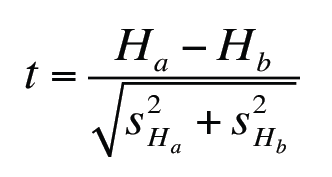
where
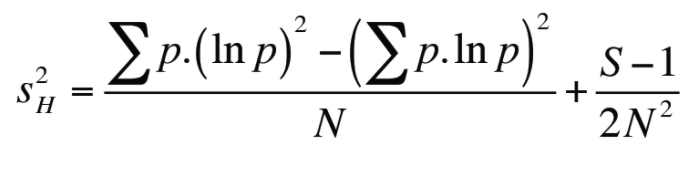
with degree of freedom (df):
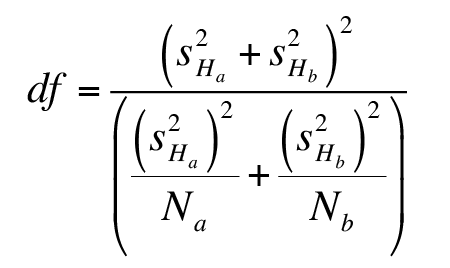
Where S is species richness (total species), p is the proportion of each species, N is the total number of individuals

**I will use the bug calculations without acoounting for function groups.**

In [19]:
Master #looking it it for reference

Site,H,EH,S,TotN
A,1.3115946,0.6307437,8,115
B,1.4449459,0.6948721,8,59
C,0.4587551,0.3309218,4,112


In [20]:
varA <- (sum(Site_A$p*(log(Site_A$p)^2)) - Master$H[1]^2)/Master$TotN[1] + (Master$S[1] - 1)/(2*Master$TotN[1]^2) #variances
varB <- (sum(Site_B$p*(log(Site_B$p)^2)) - Master$H[2]^2)/Master$TotN[2] + (Master$S[2] - 1)/(2*Master$TotN[2]^2)
varC <- (sum(Site_C$p*(log(Site_C$p)^2)) - Master$H[3]^2)/Master$TotN[3] + (Master$S[3] - 1)/(2*Master$TotN[3]^2)
var <- rbind(varA,varB,varC)

#### Comparing Site A (S. Platte blw) to Site B (S. Platte abv). Null: H_a - H_b = 0; Alternative H_a - H_b != 0. alpha = 0.05.

In [21]:
df = ((varA + varB)^2)/((varA^2)/Master$TotN[1] + (varB^2)/Master$TotN[2])
t = (Master$H[1] - Master$H[2])/sqrt(varA + varB)
2*(1-pt(abs(t),df)) #p-value

[1] 0.390094

P-value = 0.39, this is not smaller than alpha = 0.05. Therefore, not statistically significant. 

#### Comparing Site B (S. Platte abv) to Site C (Cherry C.). Null: H_b - H_c = 0; Alternative H_b - H_c != 0. alpha = 0.05.

In [22]:
df = ((varB + varC)^2)/((varB^2)/Master$TotN[2] + (varC^2)/Master$TotN[3])
t = (Master$H[2] - Master$H[3])/sqrt(varB + varC)
2*(1-pt(abs(t),df)) #p-value

[1] 7.724418e-09

P-value = 7.72 e -09, this is smaller than alpha = 0.05. Therefore, there is statistical significance diversity between of Site B and Site C.

#### Comparing Site A (S. Platte blow) to Site C (Cherry C.). Null: H_a - H_c = 0; Alternative H_a - H_c != 0. alpha = 0.05.

In [23]:
df = ((varA + varC)^2)/((varA^2)/Master$TotN[1] + (varC^2)/Master$TotN[3])
t = (Master$H[1] - Master$H[3])/sqrt(varA + varC)
2*(1-pt(abs(t),df)) #p-value

[1] 1.069811e-12

P-value = 1.07 e -12, this is smaller than alpha = 0.05. Therefore, there is statistical significance diversity between of Site A and Site C.

#### Uncertainty intervals

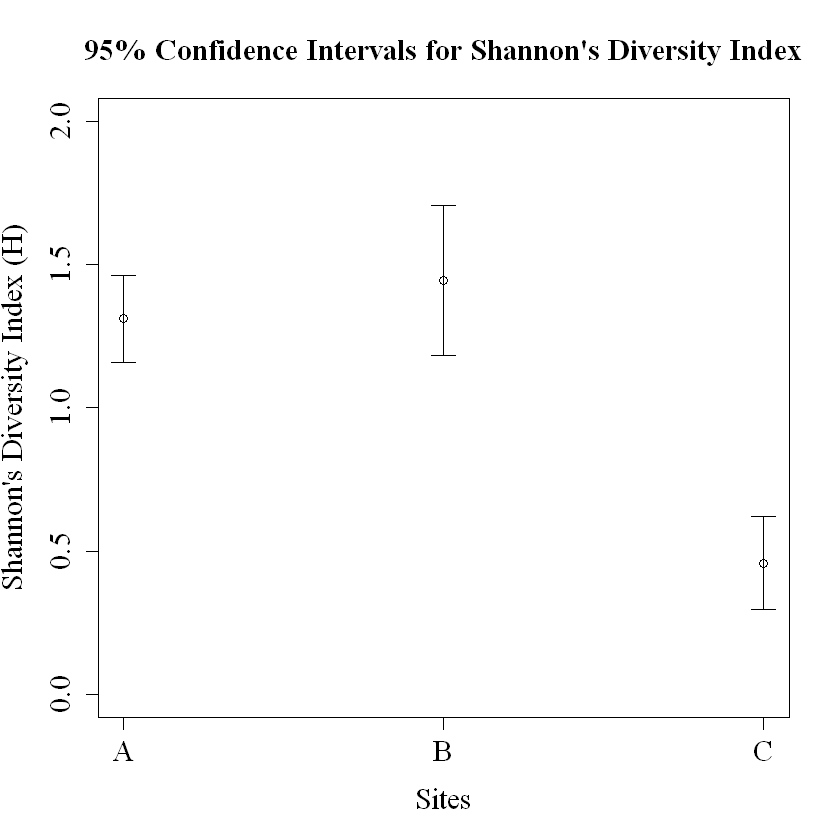

In [25]:
Fsize = 1.5
windowsFonts(A = windowsFont("Times New Roman"))
plot.default(c(1,2,3), Master$H, type='p', family="A", xaxt = 'n', ylab = "Shannon's Diversity Index (H)", family="A", 
            cex.lab = Fsize, cex.axis = Fsize, cex.main = 1.5, cex.sub = Fsize,
            xlab = "Sites", ylim = c(0,2), main = "95% Confidence Intervals for Shannon's Diversity Index")
axis(side = 1, at = c(1,2,3), labels = Master$Site, family="A", cex.axis = 1.5)
arrows(x0 = c(1,2,3), y0 = Master$H - 1.96*sqrt(var),x1 = c(1,2,3), 
       y1 = Master$H + 1.96*sqrt(var), angle = 90, code = 3, length = 0.1) #95% CI. note SE = sqrt(var/n), n = 1 for one site each

## Plotting for Project

In [26]:
data <- read.csv("project_flow.csv")

In [27]:
head(data) #examine data

X,agency_cd,datetime,tz_cd,South.Platte,Cherry.Creek
1,USGS,2021-10-08 00:00:00,MDT,44.5,6.49
2,USGS,2021-10-08 00:15:00,MDT,44.5,6.49
3,USGS,2021-10-08 00:30:00,MDT,44.5,6.49
4,USGS,2021-10-08 00:45:00,MDT,44.5,6.49
5,USGS,2021-10-08 01:00:00,MDT,44.5,6.49
6,USGS,2021-10-08 01:15:00,MDT,44.5,6.49


Now beginning a dumb way of plotting, not using tidyverse to be consistent with formatting before.More time could help simplify it down more.

In [74]:
length(as.Date(data$datetime)) #total number of data points
sum(as.Date(data$datetime) == "2021-10-08") #number of datasets in each date
levels(as.factor(as.Date(data$datetime))) #all dates

[1] 1536

[1] 96

[1] "2021-10-08" "2021-10-09" "2021-10-10" "2021-10-11" "2021-10-12"
 [6] "2021-10-13" "2021-10-14" "2021-10-15" "2021-10-16" "2021-10-17"
[11] "2021-10-18" "2021-10-19" "2021-10-20" "2021-10-21" "2021-10-22"
[16] "2021-10-23"

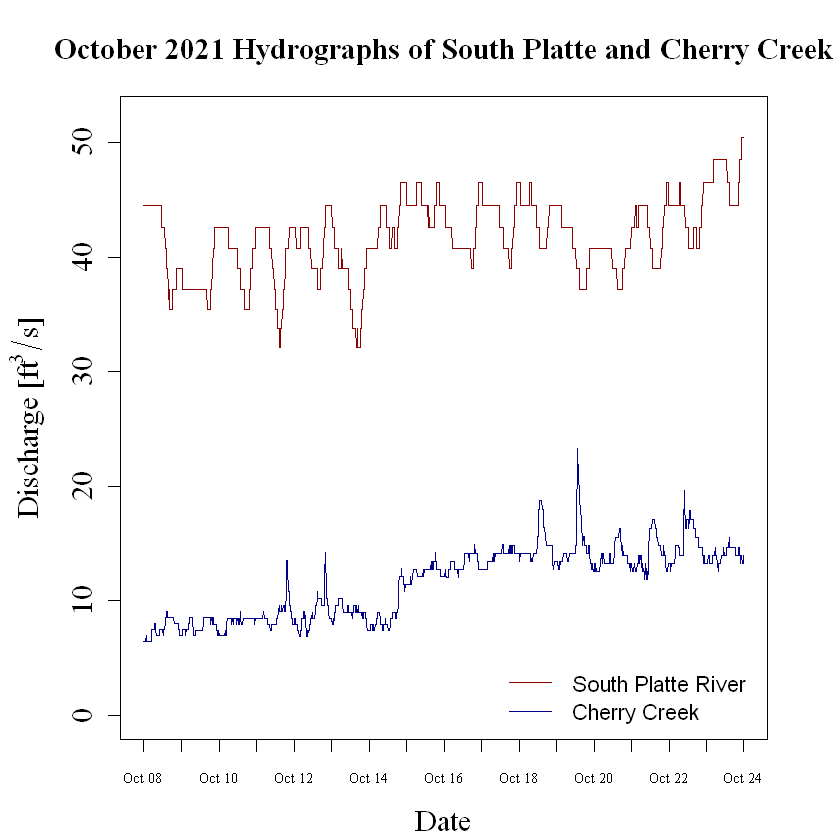

In [168]:
dates <- c("Oct 08", "Oct 09", "Oct 10", "Oct 11", "Oct 12", "Oct 13", "Oct 14", "Oct 15", 
           "Oct 16", "Oct 17", "Oct 18", "Oct 19", "Oct 20", "Oct 21", "Oct 22", "Oct 23", "Oct 24") #all the x-axis labels
windowsFonts(A = windowsFont("Times New Roman")) #use times new roman to match
par(mar=c(4.2,5,4,3)) #making sure words fit
plot.default(data$datetime, data$South.Platte, type = 'l', xaxt = 'n', ylim = c(0,52), col = "darkred", family = "A",
             main = "October 2021 Hydrographs of South Platte and Cherry Creek", xlab = "Date", 
             ylab = expression(paste("Discharge [ft"^"3"/"s","]")),  cex.lab = Fsize, cex.axis = Fsize, cex.main = 1.5, 
             cex.sub = Fsize) 
lines(data$datetime, data$Cherry.Creek, col = "darkblue")
legend(x = "bottomright", legend = c("South Platte River", "Cherry Creek"), lty = 1, cex = 1.1, 
       col = c("darkred", "darkblue"), bty = "n")
axis(side = 1, at = c(data$datetime[seq(1,length(data$datetime),96)],data$datetime[length(data$datetime)]), 
     labels = dates, family="A", cex.axis = 0.7)